In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import bz2

### Ejercicio 1
#### Count the number of lines in Python for each file

In [3]:
!ls -l

total 1014736
-rw-rw-rw- 1 angelrps angelrps    523313 Jan  8 16:31  01_intro_to_DS_toolkit_inclass.ipynb
-rw-rw-rw- 1 angelrps angelrps     50785 Jan  8 12:52  02-loading_and_saving_data_inclass.ipynb
-rw-rw-rw- 1 angelrps angelrps    142691 Jan  9 10:07  04-group_by_MINE.ipynb
-rwxrwxrwx 1 angelrps angelrps    173167 Jan  8 10:13  10-11_Python_AmadChall_v19.pptx
-rw-rw-rw- 1 angelrps angelrps      8911 Jan  9 10:58 'Amadeus Challenge_Test.ipynb'
-rw-rw-rw- 1 angelrps angelrps 554970628 Jan  9 09:44  bookings.csv.bz2
---------- 1 angelrps angelrps      4634 Jan  8 14:40 'bookings11.csv - copia'
-rw-rw-rw- 1 angelrps angelrps      1346 Jan  8 14:40 'bookings11.csv - copia.bz2'
-rw-rw-rw- 1 angelrps angelrps      1346 Jan  8 14:40  bookings11.csv.bz2
-rw-rw-rw- 1 angelrps angelrps 483188920 Jan  9 09:44  searches.csv.bz2
-rw-rw-rw- 1 angelrps angelrps       364 Jan  8 13:06  testcsvfile.csv.bz2
-rwxrwxrwx 1 angelrps angelrps       165 Jan  8 10:19 '~$10-11_Python_AmadChall_v19.pptx'


In [4]:
!bzcat bookings.csv.bz2 | wc -l
#result was 100000 11
#time processing 1' 28''

10000011


In [5]:
!bzcat searches.csv.bz2 | wc -l
#result was 20390198
#time processing 1' 30''

20390198


In [6]:
bookingsfile = bz2.open("./bookings.csv.bz2")
dfbookings = pd.read_csv(bookingsfile, sep='^')
len(dfbookings.index)
#time processing 2' 58''

/home/angelrps/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,8,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


10000010

In [7]:
searchesfile = bz2.open("./searches.csv.bz2")
dfsearches = pd.read_csv(searchesfile, sep='^')
len(dfsearches.index)
#time processing 6' 54''

/home/angelrps/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (40,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


20390198

### Ejercicio 2
#### Top 10 arrival airports in the world in 2013 (using the bookings file)

- Arrival airport is the column arr_port. It is the IATA code for the airport.
- To get the total number of passengers for an airport, you can sum the column pax, grouping by arr_port. Note that there is negative pax. That corresponds to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the canceled bookings).
- Print the top 10 arrival airports in the standard output, including the number of passengers.

- Bonus point: Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at GeoBases in Github)
- Bonus point: Solve this problem using pandas (instead of any other approach)

In [8]:
#Get 2 columns of interest
dfbookreduced = dfbookings[['arr_port','pax']]
#Group data by arr_port
grouped_bookings = dfbookreduced.groupby('arr_port')
#Sum pax, sort and show the first ten
grouped_bookings.sum().sort_values(by='pax', ascending=False).head(10)

,pax
arr_port,
LHR,88809.0
MCO,70930.0
LAX,70530.0
LAS,69630.0
JFK,66270.0
CDG,64490.0
BKK,59460.0
MIA,58150.0
SFO,58000.0


### Ejercicio 3
#### Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. 
Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.

Bonus point: Solving this problem using pandas (instead of any other approach)


In [49]:
#Take the 2 columns of interest
dfs = dfsearches[['Date','Destination']]
#remove 'day' from Date so it can be sorted by month
dfs["Date"] = dfs['Date'].str[:-3]

/home/angelrps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [97]:
#Retrieve Malaga values
#Retrieve Madrid values
#Retrieve Barcelona values
dfsAGP = dfs.loc[dfs['Destination'] == 'AGP']
dfsMAD = dfs.loc[dfs['Destination'] == 'MAD']
dfsBCN = dfs.loc[dfs['Destination'] == 'BCN']

# .value_counts() returns number of unique values for a particular column
dfsAGPcount = dfsAGP['Date'].value_counts()
dfsMADcount = dfsMAD['Date'].value_counts()
dfsBCNcount = dfsBCN['Date'].value_counts()

In [95]:
#Create cleaned and sorted Malaga data frame
MADdata = pd.DataFrame({'DateCount' : dfsMADcount, 'Destination' : 'MAD'})
MADdata.sort_index(inplace=True)
#Create cleaned and sorted Madrid data frame
AGPdata = pd.DataFrame({'DateCount' : dfsAGPcount, 'Destination' : 'AGP'})
AGPdata.sort_index(inplace=True)
#Create cleaned and sorted Barcelona data frame
BCNdata = pd.DataFrame({'DateCount' : dfsBCNcount, 'Destination' : 'BCN'})
BCNdata.sort_index(inplace=True)

#Create final data frame from other 3 data frames
FINALdata = pd.concat([AGPdata['DateCount'], MADdata['DateCount'], BCNdata['DateCount']], axis=1, keys=['AGP', 'MAD', 'BCN'])
FINALdata

,AGP,MAD,BCN
2013-01,9633,24258,29469
2013-02,8379,22800,28329
2013-03,10659,24681,30552
2013-04,8265,25251,31236
2013-05,10830,26334,28728
2013-06,7923,22800,26505
2013-07,8892,22971,29241
2013-08,7866,21831,27075
2013-09,8151,21147,23427
2013-10,6499,22294,20276


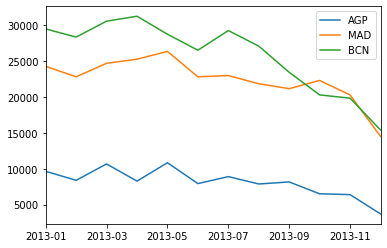

In [96]:
#Plot final data
FINALdata.plot()